<a href="https://colab.research.google.com/github/AnantSabharwal/Interview_Cracking_Analysis/blob/main/prelimnary_analysis_of_cracking_interviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Disclaimer: Analysis Conducted for Entertainment Purposes**

---



The analysis presented here was carried out purely as a **fun and exploratory activity.** It is not intended to provide factual information or authoritative figures. **The insights and findings presented are based on a casual approach and should not be considered as reliable data for decision-making or any serious purposes.**

The methods used in this analysis are meant to be lighthearted and experimental, and they may not adhere to rigorous analytical standards. As a result, **the results obtained should not be interpreted as accurate representations of reality.**

This analysis does not carry any professional or expert validation. It is important to recognize that no comprehensive research, data collection, or thorough validation was performed in the course of this exercise.

Any resemblance of the analysis to actual facts or figures is purely coincidental. **Users are strongly advised not to use the results for making important decisions, drawing conclusions, or any other serious applications.**

**By engaging with this analysis, you acknowledge that it is meant purely for entertainment purposes and should not be considered as a reliable source of information.**

[1/09/2023]

##### Importing Data & Libraries

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
interview = pd.read_excel("/content/interview_shortlist.xlsx")

In [3]:
selected = pd.read_excel("/content/finally_selected.xlsx")

##### Pre-Processing

In [4]:
#removing the word Panel from every row as that should not be important only the number is of importance

In [5]:
for index, row in interview.iterrows():
    if index != -1:
        interview.at[index, 'Name RegNo Panel Time Profile'] = row['Name RegNo Panel Time Profile'].replace('Panel', '').strip()

In [6]:
interview['Name'] = interview['Name RegNo Panel Time Profile'].str.extract(r'^(.*?\d{9})')
interview['RegNo'] = interview['Name RegNo Panel Time Profile'].str.extract(r'(\d{9})')
interview['Panel'] = interview['Name RegNo Panel Time Profile'].str.extract(r'(?<=\s)(\d{1,2})(?=\s)')
interview['Time'] = interview['Name RegNo Panel Time Profile'].str.extract(r'(\d+:\d+\s\w+)')
interview['Profile'] = interview['Name RegNo Panel Time Profile'].str.extract(r'(\w+)$')

In [7]:
interview['Name'] = interview['Name'].str.replace(r'\d', '').str.strip()
interview.drop(columns=['Name RegNo Panel Time Profile'], inplace=True)
interview["selection_status"] = 0

<ipython-input-7-fda15012a677>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  interview['Name'] = interview['Name'].str.replace(r'\d', '').str.strip()


In [9]:
selected["Name"] = selected['Name RegNo'].str.extract(r'^(.*?\d{9})')
selected['RegNo'] = selected['Name RegNo'].str.extract(r'(\d{9})')
selected['Name'] = selected['Name'].str.replace(r'\d', '').str.strip()
selected.drop(columns=['Name RegNo'], inplace=True)
selected["selection_status"] = 1

<ipython-input-9-6b8e57603588>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  selected['Name'] = selected['Name'].str.replace(r'\d', '').str.strip()


In [11]:
intXsel = pd.merge(interview, selected, on='RegNo',how='outer')

In [13]:
intXsel.drop(columns=['selection_status_x','Name_y'], inplace=True)

In [14]:
intXsel.rename(columns = {'Name_x':'Name'}, inplace = True)
intXsel.rename(columns = {'selection_status_y':'selection_status'}, inplace = True)

In [16]:
intXsel = intXsel[intXsel['Profile'] != 'Profile']

In [17]:
#intXsel['Time'] = intXsel['Time'].replace('PMG', 'PM', inplace=True)

In [18]:
#intXsel

In [19]:
def generate_initials(text):
    words = text.split()
    initials = ''.join([word[0] for word in words])
    return initials

In [20]:
intXsel['Name'] = intXsel['Name'].apply(generate_initials)

In [21]:
intXsel.drop(columns=['RegNo'], inplace=True)

##### Analysis

In [22]:
intXsel.shape

(235, 5)

In [23]:
intXsel.columns

Index(['Name', 'Panel', 'Time', 'Profile', 'selection_status'], dtype='object')

In [24]:
intXsel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 0 to 240
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              235 non-null    object 
 1   Panel             235 non-null    object 
 2   Time              235 non-null    object 
 3   Profile           235 non-null    object 
 4   selection_status  54 non-null     float64
dtypes: float64(1), object(4)
memory usage: 11.0+ KB


In [25]:
profile_counts = intXsel['Profile'].value_counts()

In [26]:
profile_counts

Software    151
PMG          60
RQA          24
Name: Profile, dtype: int64

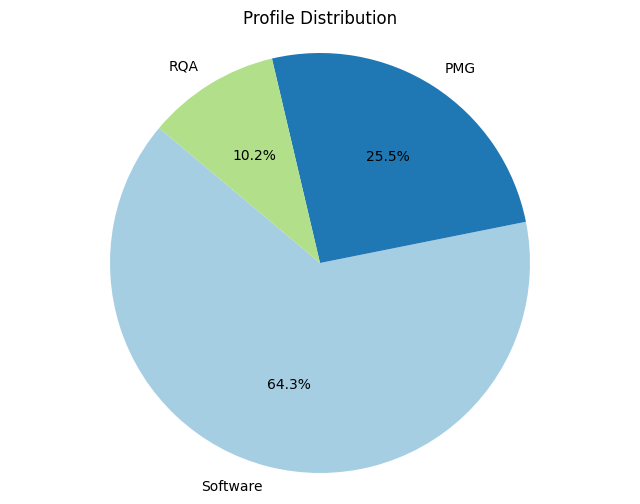

In [27]:
# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(profile_counts, labels=profile_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Profile Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [28]:
profile_counts = intXsel[intXsel['selection_status'] == 1]['Profile'].value_counts()

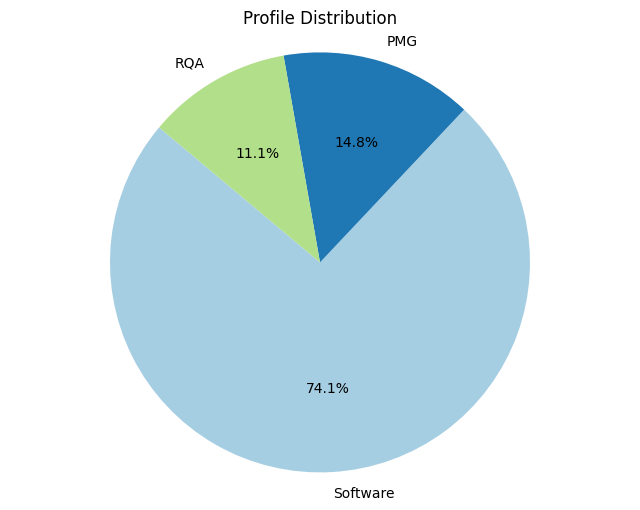

In [29]:
plt.figure(figsize=(8, 6))
plt.pie(profile_counts, labels=profile_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Profile Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

This is an interesting observation
The distribution of profiles selected shows a trend but values differ a bit
- software
    - interview = 64.3%
    - selected = 74.1%
- PMG
    - interview = 25.5%
    - selected = 14.8%
- RQA
    - interview = 10.2%
    - selected = 11.1%

In [30]:
intXsel.fillna(0)

,Name,Panel,Time,Profile,selection_status
0,ARK,1,9:00 AM,Software,0.0
1,AR,2,9:00 AM,Software,1.0
2,VSKG,3,9:00 AM,Software,0.0
3,PM,5,9:00 AM,Software,0.0
4,PJ,6,9:00 AM,Software,1.0
...,...,...,...,...,...
236,SPS,45,13:30 PMG,PMG,0.0
237,VB,44,14:00 PMG,PMG,0.0
238,PNK,45,14:00 PMG,PMG,0.0
239,TS,44,14:30 PMG,PMG,0.0


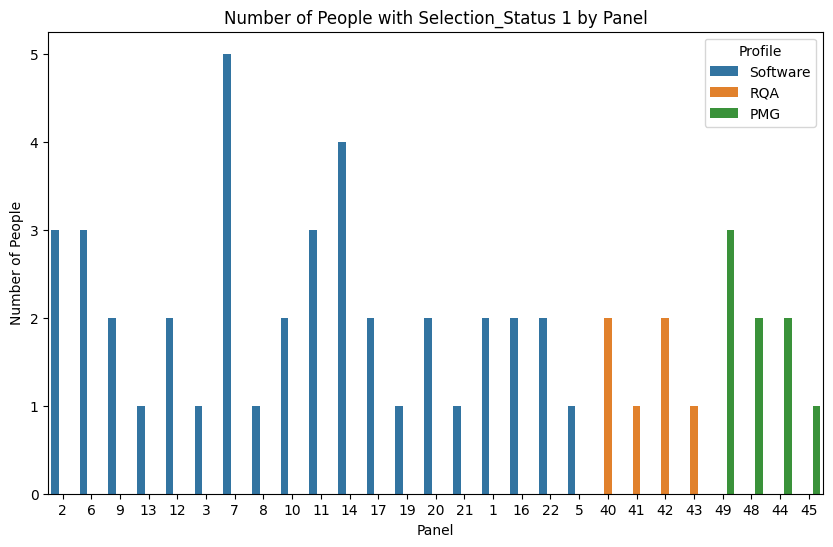

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(data=intXsel[intXsel['selection_status'] == 1], x='Panel', hue='Profile')
plt.title('Number of People with Selection_Status 1 by Panel')
plt.xlabel('Panel')
plt.ylabel('Number of People')
plt.legend(title='Profile')
plt.show()

In [32]:
unique_profiles = intXsel['Profile'].unique()

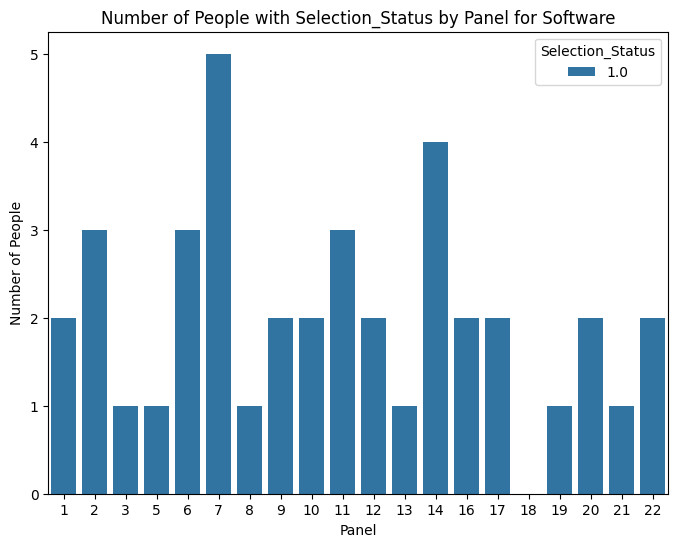

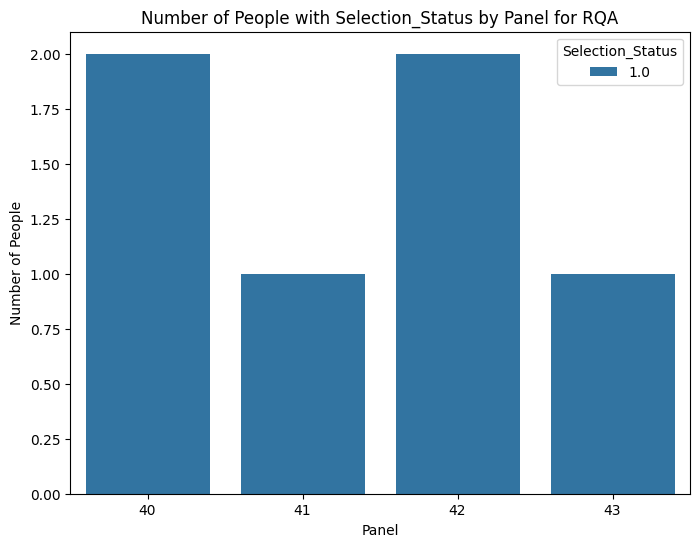

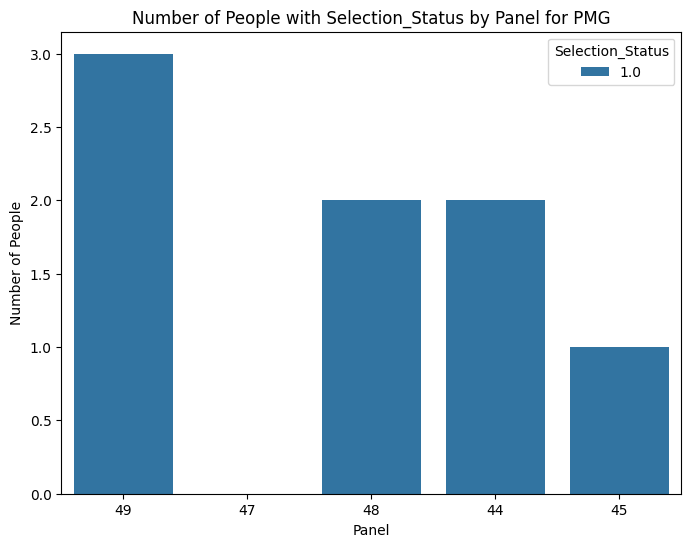

In [33]:
for profile in unique_profiles:
    plt.figure(figsize=(8, 6))
    profile_data = intXsel[intXsel['Profile'] == profile]
    sns.countplot(data=profile_data, x='Panel', hue='selection_status')
    plt.title(f'Number of People with Selection_Status by Panel for {profile}')
    plt.xlabel('Panel')
    plt.ylabel('Number of People')
    plt.legend(title='Selection_Status')

    plt.show()

In [34]:
#distribution of number of interviewees across each panel

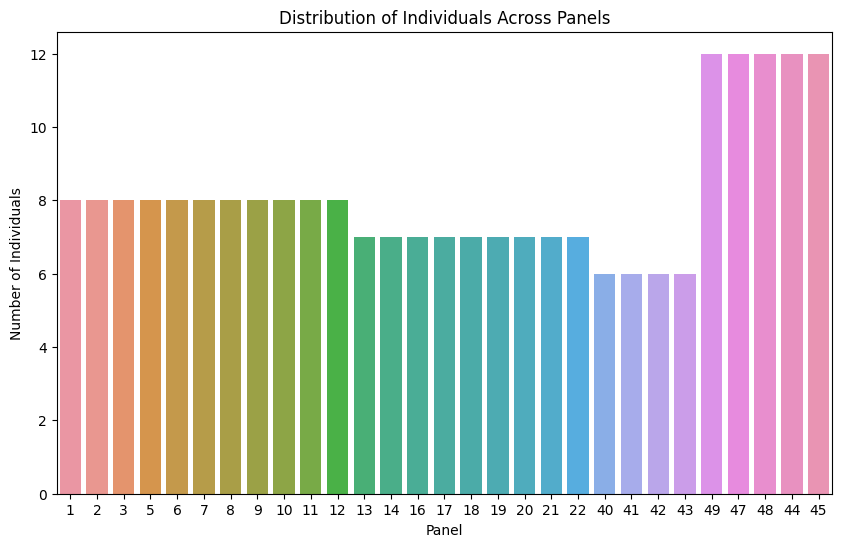

In [35]:
plt.figure(figsize=(10, 6))
sns.countplot(data=intXsel, x='Panel')
plt.title('Distribution of Individuals Across Panels')
plt.xlabel('Panel')
plt.ylabel('Number of Individuals')
plt.show()

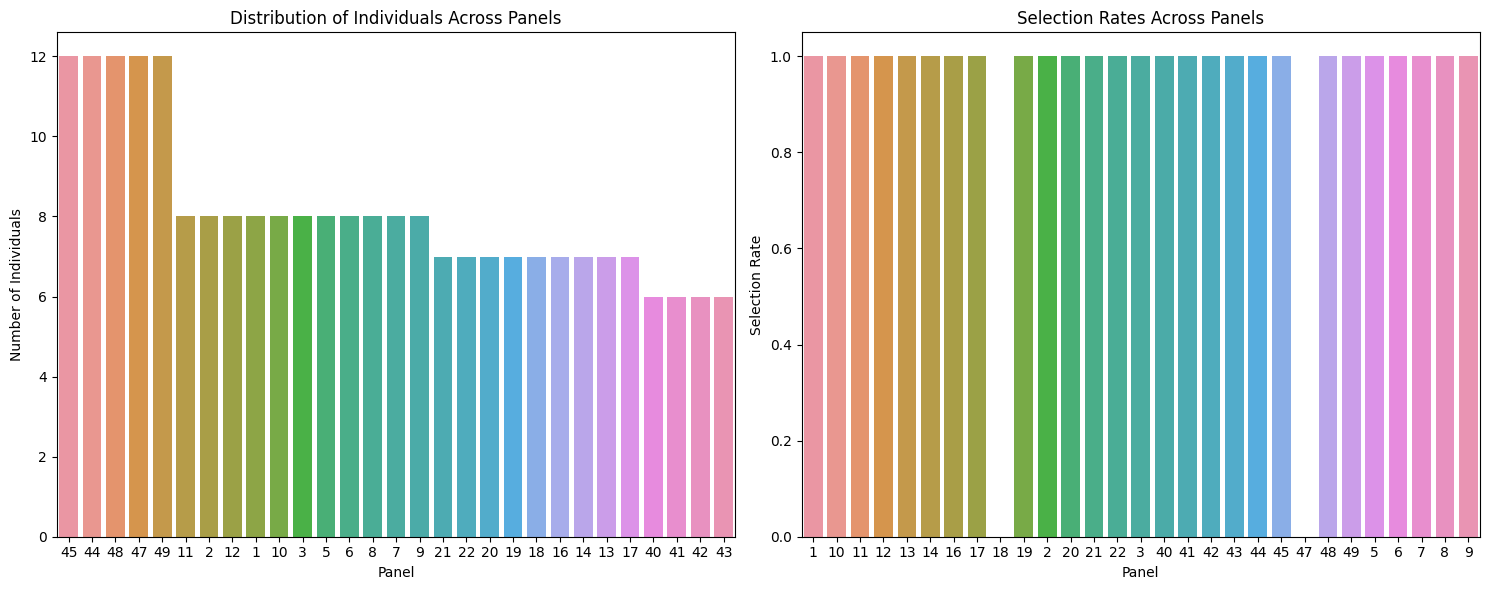

In [36]:
panel_distribution = intXsel['Panel'].value_counts()

panel_selection_rates = intXsel.groupby('Panel')['selection_status'].mean()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(x=panel_distribution.index, y=panel_distribution.values, ax=ax1)
ax1.set_title('Distribution of Individuals Across Panels')
ax1.set_xlabel('Panel')
ax1.set_ylabel('Number of Individuals')

sns.barplot(x=panel_selection_rates.index, y=panel_selection_rates.values, ax=ax2)
ax2.set_title('Selection Rates Across Panels')
ax2.set_xlabel('Panel')
ax2.set_ylabel('Selection Rate')

plt.tight_layout()
plt.show()

In [37]:
intXsel['Time'].value_counts()

11:30 AM     28
9:00 AM      24
10:30 AM     24
11:00 AM     24
9:30 AM      24
10:00 AM     20
12:00 PM     20
12:30 PM     11
12:00 PMG     5
14:00 PMG     5
13:30 PMG     5
13:00 PMG     5
12:30 PMG     5
10:00 PMG     5
11:30 PMG     5
11:00 PMG     5
10:30 PMG     5
09:30 PMG     5
09:00 PMG     5
14:30 PMG     5
Name: Time, dtype: int64

In [38]:
time_mapping = {'9:00 AM': 900, '10:00 AM': 1000, '9:30 AM': 930, '10:30 AM': 1030, '11:00 AM': 1100, '11:30 AM':1130,'12:00 PM':1200,'12:30 PM':1230,'12:00 PMG':1200,'14:00 PMG':1400,'13:30 PMG':1330,'13:00 PMG':1300,'12:30 PMG':1230,'10:00 PMG':1000,'11:30 PMG':1130,'11:00 PMG':1100,'10:30 PMG':1030,'09:30 PMG':930,'09:00 PMG':900,'14:30 PMG':1430}
intXsel['Time'] = intXsel['Time'].map(time_mapping)

In [39]:
intXsel.fillna(0)

,Name,Panel,Time,Profile,selection_status
0,ARK,1,900,Software,0.0
1,AR,2,900,Software,1.0
2,VSKG,3,900,Software,0.0
3,PM,5,900,Software,0.0
4,PJ,6,900,Software,1.0
...,...,...,...,...,...
236,SPS,45,1330,PMG,0.0
237,VB,44,1400,PMG,0.0
238,PNK,45,1400,PMG,0.0
239,TS,44,1430,PMG,0.0


In [40]:
intXsel.head()

,Name,Panel,Time,Profile,selection_status
0,ARK,1,900,Software,NaN
1,AR,2,900,Software,1.0
2,VSKG,3,900,Software,NaN
3,PM,5,900,Software,NaN
4,PJ,6,900,Software,1.0


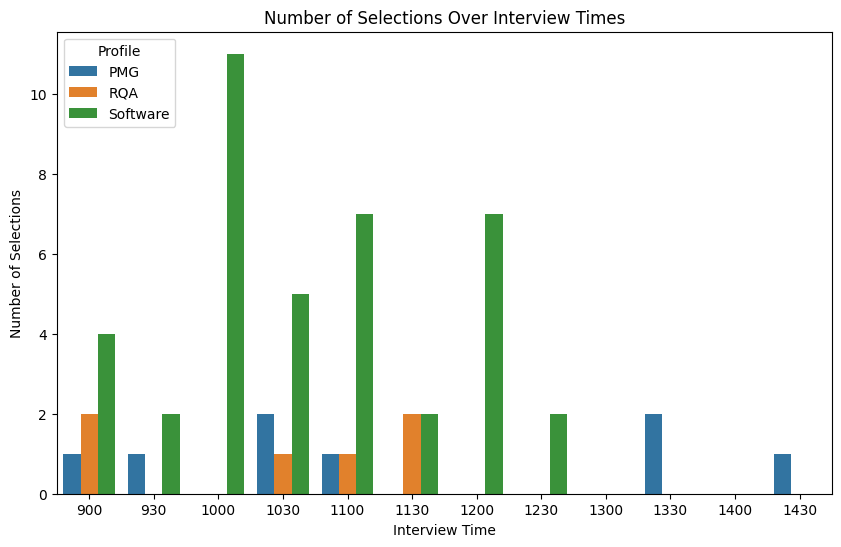

In [42]:
grouped_data = intXsel.groupby(['Time', 'Profile'])['selection_status'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_data, x='Time', y='selection_status', hue='Profile')
plt.title('Number of Selections Over Interview Times')
plt.xlabel('Interview Time')
plt.ylabel('Number of Selections')
plt.legend(title='Profile')
plt.show()

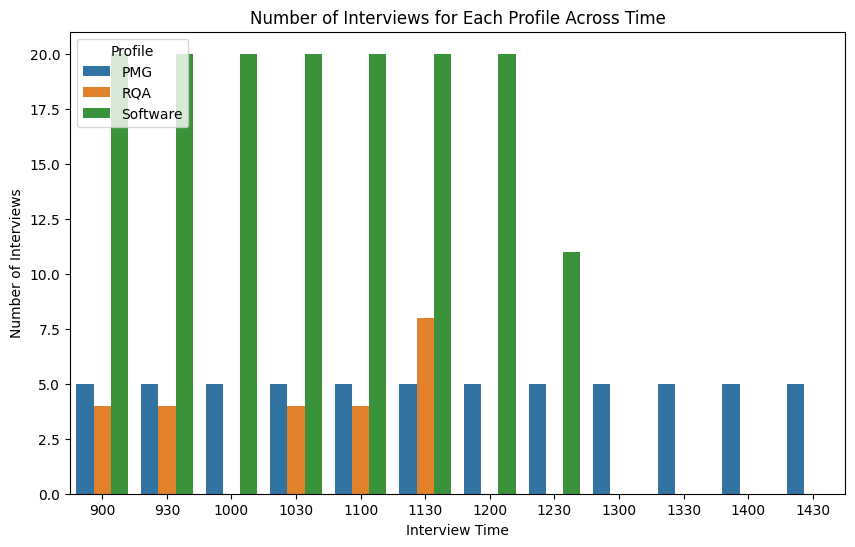

In [43]:
profile_counts = intXsel.groupby(['Time', 'Profile']).size().reset_index(name='Interviews')

plt.figure(figsize=(10, 6))
sns.barplot(data=profile_counts, x='Time', y='Interviews', hue='Profile')
plt.title('Number of Interviews for Each Profile Across Time')
plt.xlabel('Interview Time')
plt.ylabel('Number of Interviews')
plt.legend(title='Profile')
plt.show()

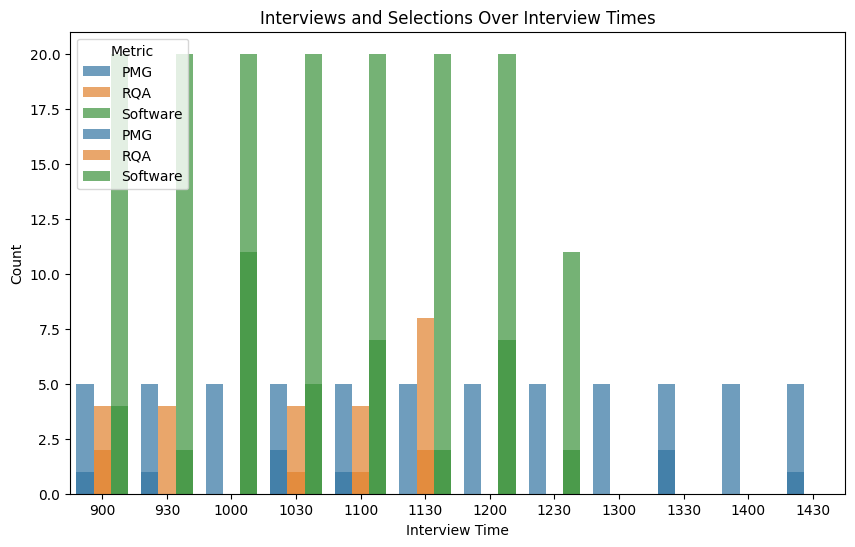

In [45]:
profile_counts = intXsel.groupby(['Time', 'Profile']).size().reset_index(name='Interviews')
grouped_data = intXsel.groupby(['Time', 'Profile'])['selection_status'].sum().reset_index()

plt.figure(figsize=(10, 6))

interview_plot = sns.barplot(data=profile_counts, x='Time', y='Interviews', hue='Profile', alpha=0.7)
selection_plot = sns.barplot(data=grouped_data, x='Time', y='selection_status', hue='Profile', alpha=0.7)

interview_plot.set_label('Interviews')
selection_plot.set_label('Selections')

plt.title('Interviews and Selections Over Interview Times')
plt.xlabel('Interview Time')
plt.ylabel('Count')

plt.legend(title='Metric')
plt.show()

This might give interesting insights

##### Conclusion

The little insight that we were able to extract from the data included the fact that
- certain panels led to zero selections (this might be due to a number of reasons that could be analyzed with additional data.)
- certain time slots also lead to fewer selections
- the distribution of shortlist and final selection was almost in the same proportion for one role while for the other two there was a difference of about 10%.

##### Future Works

- In-depth analysis of selection procedure with additional information regarding average interview time , topics discussed and comments from both the parties regardding the interview.